# Using k-nearest neighbours to classify Iris samples as species (_setosa_, _versicolor_ or _virginica_) based on flower measurements

## Getting started

We import a few essential libraries first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Next, we read the CSV file to load our dataset into a Pandas DataFrame. To print the shape and get an idea of the size of the data, we print the DataFrame's shape.

In [2]:
iris = pd.read_csv('../VSCode/Ml/Iris Dataset Classification (KNN)/Iris.csv')
print(iris.shape)

(150, 6)


So, the dataframe contains 150 rows and 6 columns. Time to look at the first few entries to understand the way our data is arranged.

In [3]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


We see that we can drop the 'Id' column since it's not giving us much information.

In [4]:
iris.drop('Id', axis = 1, inplace = True)
print(iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


The features are straightforward. 'Sepal' and 'Petal' are parts of a flower. Sepal/Petal width and length therefore measure the physical dimensions of these parts. 'Species' denotes the species of the measured flower.

Now, we take a look at the summary statistics of our dataset.

In [5]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


There are no missing values in the dataset, which is good news.

## Exploratory Data Analysis

Let's see how evenly distributed the data is across 'Species'.

In [6]:
print(iris['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


We observe that the data is perfectly evenly distributed across all species, with 50 records per species.

Now, let's make some univariate plots to understand how the data varies.

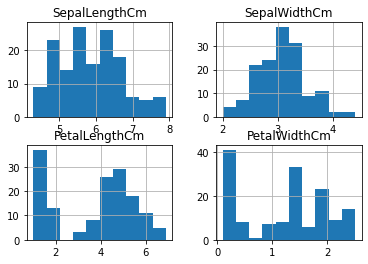

In [7]:
iris.hist()
plt.show()

So, we can see that sepal width and (roughly) sepal length follow a normal distribution. Petal length appears to follow a bimodal distribution. Petal width does not follow a distribution consistently.

We must get a better understanding of how the data of each class (each species) is grouped together. This will help us decide what feature(s) to use. To do so, we plot a scatter graph.

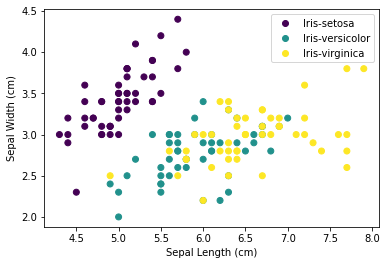

In [8]:
# dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
# integer colour code
colours = [inv_name_dict[item] for item in iris['Species']]

# scatter plot (sepal)
scatter = plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c = colours)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
# add legend
plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

Plotting sepal length against sepal width, we see that we could potentially separate _setosa_ from _versicolor_ and _virginica_, but there is less distinction between _versicolor_ and _virginica_. There is also a low level of correlation.

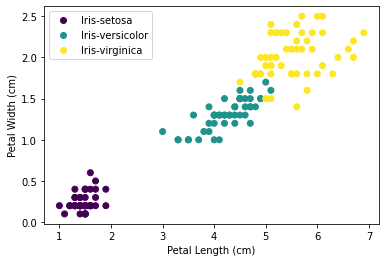

In [9]:
# scatter plot (petal)
scatter = plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c = colours)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
# add legend
plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

Plotting petal length against petal width, we see that the distinctions between the species are much more clear. _setosa_ is very distinct. _versicolor_ and _virginica_ still have less of a boundary but it is much more clearer than when using sepal features. There is a high level of correlation. Therefore, this pair of features is probably the best to use to classify them.

## Classification model: K-Nearest Neighbours

K-Nearest Neighbours (KNN) is a classification algorithm. It works by examining a desired data point, inspecting 'x' number of its closest data points (i.e. its 'k' nearest neighbours) to identify what class they belong to, and classifying the desired point as the majority result of the neighbours' classes.

With the data analysis we have done so far, KNN is an appropriate model to use.

## Data Preparation

In [10]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

We select petal length and petal width as features in X, and the species values in y.

## Building the model

We imported the KNeighborsClassifier class from scikit-learn. Let's create a KNeighborsClassifier object for our model.

In [11]:
knn = KNeighborsClassifier()

KNeighborsClassifier has an important hyperparameter (defined beforehand to control the learning) known as n_neighbors. n_neighbors is the number of neighbours of a given data point that will be examined to classify the data point. Changing n_neighbors will change the number of neighbours of the datum to be considered, and therefore might change the outcome of the classification.
Hence, we must find the best value for n_neighbors (hyperparameter tuning). We can use a dictionary and GridSearchCV for this.

In [12]:
# create a dict of all the values to be tested for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv = 5)

GridSearchCV automoatically performs train-test splitting for us since it uses 5-fold cross validation.

## Fitting the model and finding the best parameters

Now that we have defined the model, we can fit it to our data.

In [13]:
# fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

GridSearchCV has fitted 8 models with n_neighbors as values from 2 to 9 (incl.). We can use its properties to find out which value of n_neighbors yielded the best accuracy:

In [14]:
# check best parameter
print(knn_gscv.best_params_)

{'n_neighbors': 4}


Hence, the best value for n_neighbors is 4. We can also check the accuracy score of this value:

In [15]:
# check best score
print("Accuracy: ", knn_gscv.best_score_)

Accuracy:  0.9666666666666668


So, examining the 4 nearest neighbors of a datum to classify the data means that our model gets it right 97% of the time. Recall our exploratory data analysis: it was harder to separate _versicolor_ from _virginica_, so it's likely that the 3% error originates from there. We can verify this using a confusion matrix:

[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]


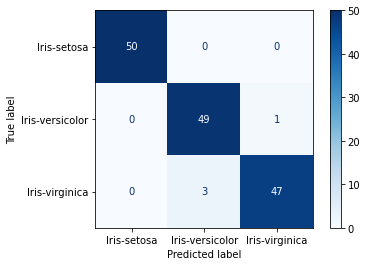

In [20]:
y_pred = knn_gscv.best_estimator_.predict(X)
print(confusion_matrix(y, y_pred))
plot_confusion_matrix(knn_gscv.best_estimator_, X, y, cmap = plt.cm.Blues)
plt.show()

The rows depict actual species while columns depict predicted species. 
So, 50 instances of _setosa_ were classified as _setosa_ with no errors. 
49 instances of _versicolor_ were predicted as _versicolor_ and 1 was predicted as _virginica_. 
47 instances of _virginica_ were predicted as _virginica_ and 3 were predicted as _versicolor_. 
These errors in classification are explained by the blurred distinction between these two species in terms of petal length and width.

## Final model

Now we can build our final model.

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)
y_pred = knn_final.predict(X)
print(confusion_matrix(y, y_pred))
print(cross_val_score(knn_final, X, y).mean())

Our final model has n_neighbors = 4 and a mean cross-validation score of approximately 97%.